In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline  

import torch
import torch.nn as nn

import torch.optim as optim

from copy import deepcopy

from torch.distributions import Categorical

import itertools

import sys
sys.path.insert(0, './../libraries/')

import partial_marginalization_lib as pm_lib
import gmm_experiments_lib as gmm_lib

In [2]:
softmax = nn.Softmax(dim = 0)

sigmoid = nn.Sigmoid()

In [3]:
import torch

In [4]:
np.random.seed(45224)
_ = torch.manual_seed(45224)

In [5]:
mu0 = torch.Tensor([0, 0])
sigma0 = 20.
n_clusters = 5

n_obs = 200

In [6]:
gmm_experiment = gmm_lib.GMMExperiments(n_obs, mu0, sigma0, n_clusters, hidden_dim=100)

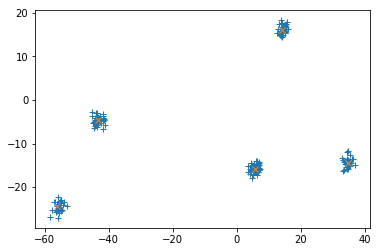

In [7]:
plt.plot(gmm_experiment.y[:, 0].numpy(), gmm_experiment.y[:, 1].numpy(), '+')
plt.plot(gmm_experiment.true_mus[:, 0].numpy(), gmm_experiment.true_mus[:, 1].numpy(), 'x')

In [8]:
obj_class_reinforce = pm_lib.PartialMarginalizationREINFORCE(gmm_experiment)

In [9]:
obj_class_reinforce.experiment_class.set_random_var_params()

In [10]:
obj_class_reinforce.experiment_class.var_params

{'free_class_weights': tensor([[ 0.9279,  0.6943,  0.4903,  0.9194,  0.3087],
         [ 0.9512,  0.2774,  0.4301,  0.9715,  0.3795],
         [ 0.6867,  0.6627,  0.6194,  0.8222,  0.5579],
         [ 0.2164,  0.8895,  0.5518,  0.7434,  0.0972],
         [ 0.9946,  0.0331,  0.9320,  0.3093,  0.2923],
         [ 0.2870,  0.8626,  0.7528,  0.9693,  0.7240],
         [ 0.0944,  0.3359,  0.2681,  0.8414,  0.3476],
         [ 0.6024,  0.9501,  0.9435,  0.9411,  0.0645],
         [ 0.1079,  0.8993,  0.0473,  0.5648,  0.4304],
         [ 0.4513,  0.4368,  0.7649,  0.0580,  0.2481],
         [ 0.2612,  0.7508,  0.1286,  0.5816,  0.3005],
         [ 0.4463,  0.3823,  0.2721,  0.1631,  0.5742],
         [ 0.0775,  0.5706,  0.2805,  0.9990,  0.1824],
         [ 0.3980,  0.7208,  0.9246,  0.2072,  0.8735],
         [ 0.2132,  0.1929,  0.1537,  0.1063,  0.6158],
         [ 0.9586,  0.0433,  0.9348,  0.1022,  0.9898],
         [ 0.6381,  0.8065,  0.5555,  0.8154,  0.5260],
         [ 0.3116,  0.1131

In [11]:
vb_params_opt, losses = obj_class_reinforce.run_SGD(alpha=0.0, topk = 0, lr = 1e-3, n_steps=1000, 
                                               use_true_grad = True)

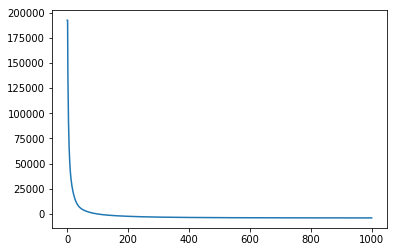

In [12]:
plt.plot(losses)

In [13]:
class_weights_opt = deepcopy(obj_class_reinforce.class_weights)
centroids_opt = vb_params_opt['centroids']
sigma_opt = vb_params_opt['log_sigma']

z_ind = torch.argmax(obj_class_reinforce.class_weights, dim=1).numpy()

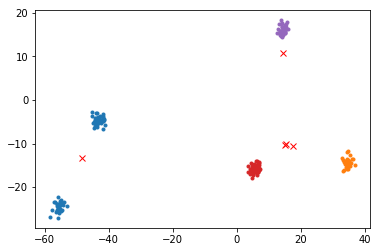

In [14]:
plt.figure()
plt.plot(centroids_opt[:, 0].detach().numpy(), 
         centroids_opt[:, 1].detach().numpy(), 'x', color = 'red')
# plt.plot(gmm_experiment.true_mus[:, 0].numpy(), 
#          gmm_experiment.true_mus[:, 1].numpy(), 'x', color = 'blue')

for i in range(n_clusters): 
    plt.plot(gmm_experiment.y.numpy()[z_ind == i, 0], 
            gmm_experiment.y.numpy()[z_ind == i, 1], '.')
    

In [15]:
torch.argmax(obj_class_reinforce.class_weights, dim=1)[0:4]

tensor([ 0,  0,  4,  1])

In [16]:
gmm_experiment.z[0:4]

tensor([ 0.,  0.,  3.,  2.])